# *Predicting Compressive Strength Of Concrete*

In [1]:
# IMPORTING REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

In [11]:
cData = pd.read_csv('compresive_strength_concrete+2.csv') # Loading Dataset
cData.head() # viewing first 5 rows

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
cData.columns # Columns of dataset

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [13]:
cData.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BlastFurnaceSlag',
'Fly Ash (component 3)(kg in a m^3 mixture)':'FlyAsh',
'Water  (component 4)(kg in a m^3 mixture)':'Water',
'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'CoarseAggregate',
'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAggregate', 
 'Age (day)':'Age',
'Concrete compressive strength(MPa, megapascals) ':'ConcreteCompressiveStrength'}, inplace=True) # Renaming columns 

In [14]:
cData.columns # Columns of dataset

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

In [15]:
cData.dtypes # All the data types are float and int

Cement                         float64
BlastFurnaceSlag               float64
FlyAsh                         float64
Water                          float64
Superplasticizer               float64
CoarseAggregate                float64
FineAggregate                  float64
Age                              int64
ConcreteCompressiveStrength    float64
dtype: object

In [16]:
cData.shape # Checking the shape of the data

(1030, 9)

In [18]:
cData.isnull().sum() # Checking the Null values

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

In [19]:
# Shows there are no null values

In [20]:
cData.describe() # Checking 5 number summary

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
# All the features are in different scales
# BlastFurnaceSlag, Superplasticizer and FlyAsh have minimum value as 0 (need to check further)

## *EXPLORATORY DATA ANALYSIS*

### *CEMENT*

In [28]:
from scipy import stats # importing scipy package

# Quartiles

Q1 = cData['Cement'].quantile(0.25)
Q3 = cData['Cement'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')
# print('IQR : {}'.format(stats.iqr(cData['Cement'])))

1st Quartile : 192.375
3rd Quartile : 350.0
IQR : 157.625


In [32]:
# Outlier Detection from IQR in original data 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound for Cement: {lower_bound}')
print(f'Upper Bound for Cement: {upper_bound}')

Lower Bound for Cement: -44.0625
Upper Bound for Cement: 586.4375


In [42]:
# Checking the presence of outliers with the upper and lower bounds

cData[(cData['Cement'] < lower_bound) | (cData['Cement'] > upper_bound)]['Cement'].count()

# print('Number of outliers in cement upper: ', df[df['cement']>upper_bound]['cement'].count())
# print('Number of outliers in cement lower: ', df[df['cement']<lower_bound]['cement'].count())

0

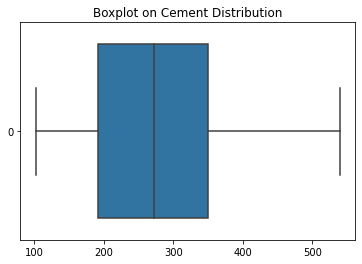

In [46]:
# Distribution of Cement

sns.boxplot(data=cData['Cement'], orient='h')
plt.title('Boxplot on Cement Distribution')
plt.show()

In [47]:
# There are no outliers in cement

### *FLY ASH*

<Figure size 720x576 with 0 Axes>

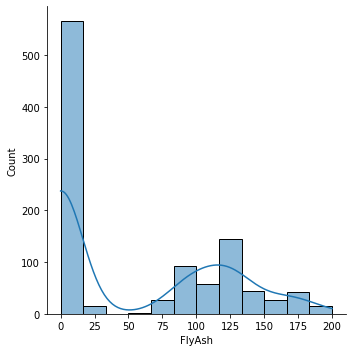

In [52]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['FlyAsh'], kde = True)

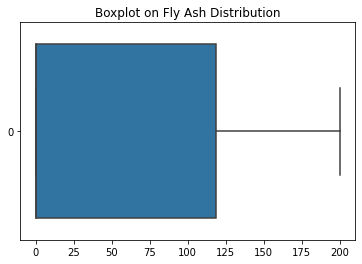

In [53]:
sns.boxplot(data=cData['FlyAsh'], orient='h')
plt.title('Boxplot on Fly Ash Distribution')
plt.show()

In [74]:
# Quartiles

Q1 = cData['FlyAsh'].quantile(0.25)
Q3 = cData['FlyAsh'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

1st Quartile : 0.0
3rd Quartile : 118.3
IQR : 118.3


In [75]:
# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for Fly Ash: {lower_bound}')
print(f'Upper Bound for Fly Ash: {upper_bound}')

Lower Bound for Fly Ash: -177.45
Upper Bound for Fly Ash: 295.75


In [76]:
# Checking the presence of outliers with the upper and lower bounds

cData[(cData['FlyAsh'] < lower_bound) | (cData['FlyAsh'] > upper_bound)]['FlyAsh'].count()

# print('Number of outliers in cement upper: ', df[df['cement']>upper_bound]['FlyAsh'].count())
# print('Number of outliers in cement lower: ', df[df['cement']<lower_bound]['FlyAsh'].count())

0

In [54]:
# There are no outliers in Fly Ash

### *WATER*

In [79]:
# Quartiles

Q1 = cData['Water'].quantile(0.25)
Q3 = cData['Water'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for Water: {lower_bound}')
print(f'Upper Bound for Water: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['Water'] < lower_bound) | (cData['Water'] > upper_bound)]['Water'].count()


1st Quartile : 164.9
3rd Quartile : 192.0
IQR : 27.099999999999994
Lower Bound for Water: 124.25000000000001
Upper Bound for Water: 232.64999999999998


9

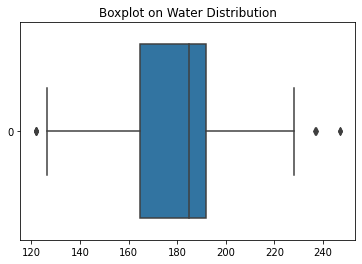

In [80]:
sns.boxplot(data=cData['Water'], orient='h')
plt.title('Boxplot on Water Distribution')
plt.show()

In [81]:
cData[(cData['Water'] < lower_bound)]['Water'].count()

5

In [82]:
cData[(cData['Water'] > upper_bound)]['Water'].count()

4

<Figure size 720x576 with 0 Axes>

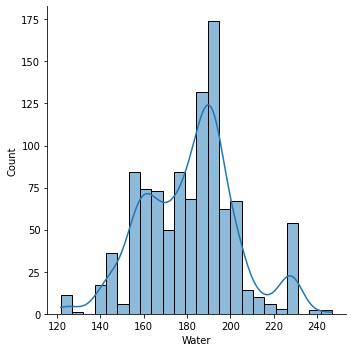

In [83]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['Water'], kde = True)

### *BLAST FURNACE SLAG*

In [84]:
# Quartiles

Q1 = cData['BlastFurnaceSlag'].quantile(0.25)
Q3 = cData['BlastFurnaceSlag'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for Blast Furnace Slag: {lower_bound}')
print(f'Upper Bound for Blast Furnace Slag: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['BlastFurnaceSlag'] < lower_bound) | (cData['BlastFurnaceSlag'] > upper_bound)]['BlastFurnaceSlag'].count()


1st Quartile : 0.0
3rd Quartile : 142.95
IQR : 142.95
Lower Bound for Blast Furnace Slag: -214.42499999999998
Upper Bound for Blast Furnace Slag: 357.375


2

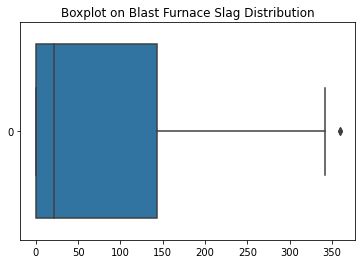

In [85]:
sns.boxplot(data=cData['BlastFurnaceSlag'], orient='h')
plt.title('Boxplot on Blast Furnace Slag Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

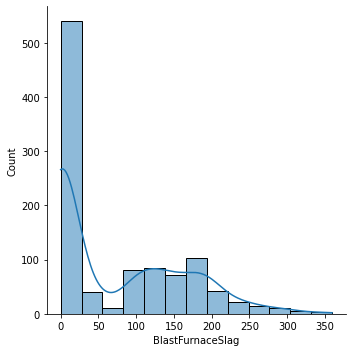

In [86]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['BlastFurnaceSlag'], kde = True)

### *AGE*

In [88]:
# Quartiles

Q1 = cData['Age'].quantile(0.25)
Q3 = cData['Age'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for Age: {lower_bound}')
print(f'Upper Bound for Age: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['Age'] < lower_bound) | (cData['Age'] > upper_bound)]['Age'].count()


1st Quartile : 7.0
3rd Quartile : 56.0
IQR : 49.0
Lower Bound for Age: -66.5
Upper Bound for Age: 129.5


59

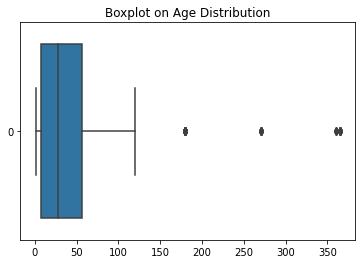

In [89]:
sns.boxplot(data=cData['Age'], orient='h')
plt.title('Boxplot on Age Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

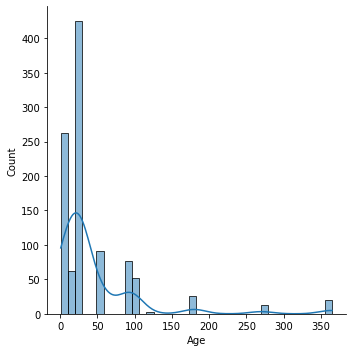

In [90]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['Age'], kde = True)

### *SUPERPLASTICIZER*

In [92]:
# Quartiles

Q1 = cData['Superplasticizer'].quantile(0.25)
Q3 = cData['Superplasticizer'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for Superplasticizer: {lower_bound}')
print(f'Upper Bound for Superplasticizer: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['Superplasticizer'] < lower_bound) | (cData['Superplasticizer'] > upper_bound)]['Superplasticizer'].count()


1st Quartile : 0.0
3rd Quartile : 10.2
IQR : 10.2
Lower Bound for Superplasticizer: -15.299999999999999
Upper Bound for Superplasticizer: 25.5


10

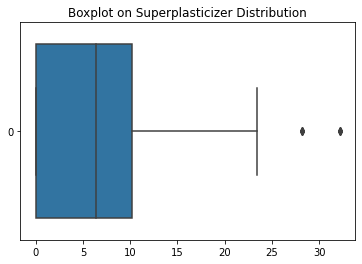

In [93]:
sns.boxplot(data=cData['Superplasticizer'], orient='h')
plt.title('Boxplot on Superplasticizer Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

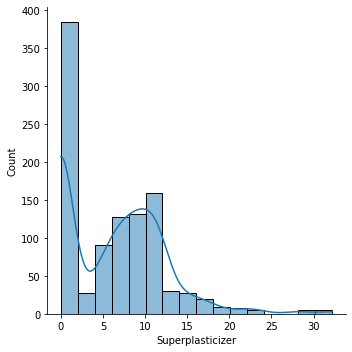

In [94]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['Superplasticizer'], kde = True)

### *CoarseAggregate*

In [95]:
# Quartiles

Q1 = cData['Superplasticizer'].quantile(0.25)
Q3 = cData['Superplasticizer'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for Superplasticizer: {lower_bound}')
print(f'Upper Bound for Superplasticizer: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['Superplasticizer'] < lower_bound) | (cData['Superplasticizer'] > upper_bound)]['Superplasticizer'].count()


1st Quartile : 0.0
3rd Quartile : 10.2
IQR : 10.2
Lower Bound for Superplasticizer: -15.299999999999999
Upper Bound for Superplasticizer: 25.5


10

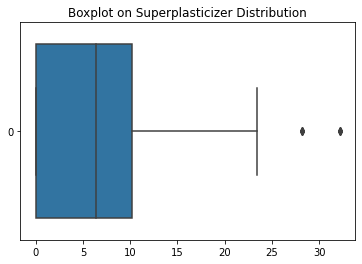

In [96]:
sns.boxplot(data=cData['Superplasticizer'], orient='h')
plt.title('Boxplot on Superplasticizer Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

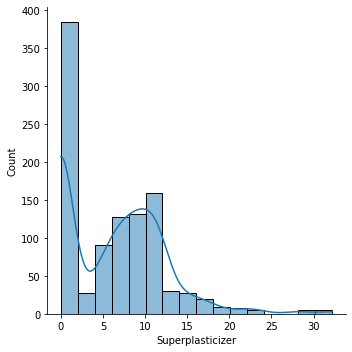

In [97]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['Superplasticizer'], kde = True)

### *FineAggregate*

In [98]:
# Quartiles

Q1 = cData['FineAggregate'].quantile(0.25)
Q3 = cData['FineAggregate'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for FineAggregate: {lower_bound}')
print(f'Upper Bound for FineAggregate: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['FineAggregate'] < lower_bound) | (cData['FineAggregate'] > upper_bound)]['FineAggregate'].count()


1st Quartile : 730.95
3rd Quartile : 824.0
IQR : 93.04999999999995
Lower Bound for FineAggregate: 591.3750000000001
Upper Bound for FineAggregate: 963.5749999999999


5

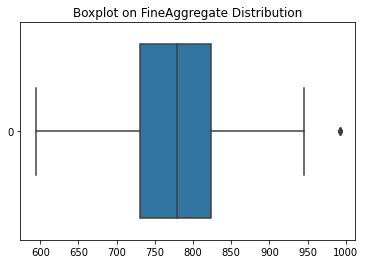

In [99]:
sns.boxplot(data=cData['FineAggregate'], orient='h')
plt.title('Boxplot on FineAggregate Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

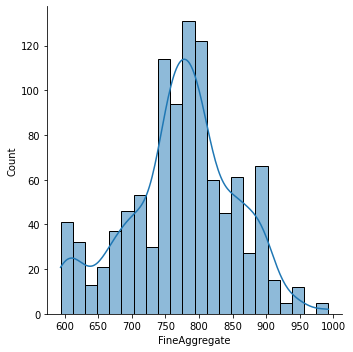

In [100]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['FineAggregate'], kde = True)

### *ConcreteCompressiveStrength*

In [101]:
# Quartiles

Q1 = cData['ConcreteCompressiveStrength'].quantile(0.25)
Q3 = cData['ConcreteCompressiveStrength'].quantile(0.75)
IQR = Q3 - Q1

print(f'1st Quartile : {Q1}')
print(f'3rd Quartile : {Q3}')
print(f'IQR : {IQR}')

# Outlier Detection from IQR in original data 

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound for ConcreteCompressiveStrength: {lower_bound}')
print(f'Upper Bound for ConcreteCompressiveStrength: {upper_bound}')

# Checking the presence of outliers with the upper and lower bounds

cData[(cData['ConcreteCompressiveStrength'] < lower_bound) | (cData['ConcreteCompressiveStrength'] > upper_bound)]['ConcreteCompressiveStrength'].count()


1st Quartile : 23.71
3rd Quartile : 46.135000000000005
IQR : 22.425000000000004
Lower Bound for ConcreteCompressiveStrength: -9.927500000000002
Upper Bound for ConcreteCompressiveStrength: 79.77250000000001


4

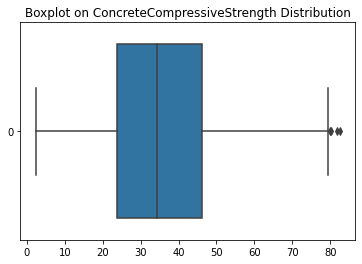

In [102]:
sns.boxplot(data=cData['ConcreteCompressiveStrength'], orient='h')
plt.title('Boxplot on ConcreteCompressiveStrength Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

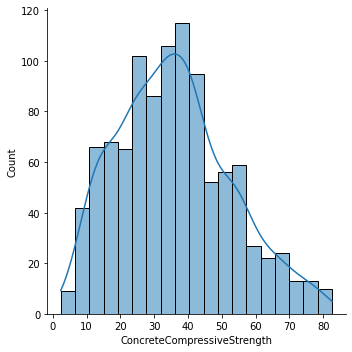

In [103]:
plt.figure(figsize=(10,8))
sns.displot(x=cData['ConcreteCompressiveStrength'], kde = True)

## *MULTIVARIATE ANALYSIS*

In [104]:
cData.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'ConcreteCompressiveStrength'],
      dtype='object')

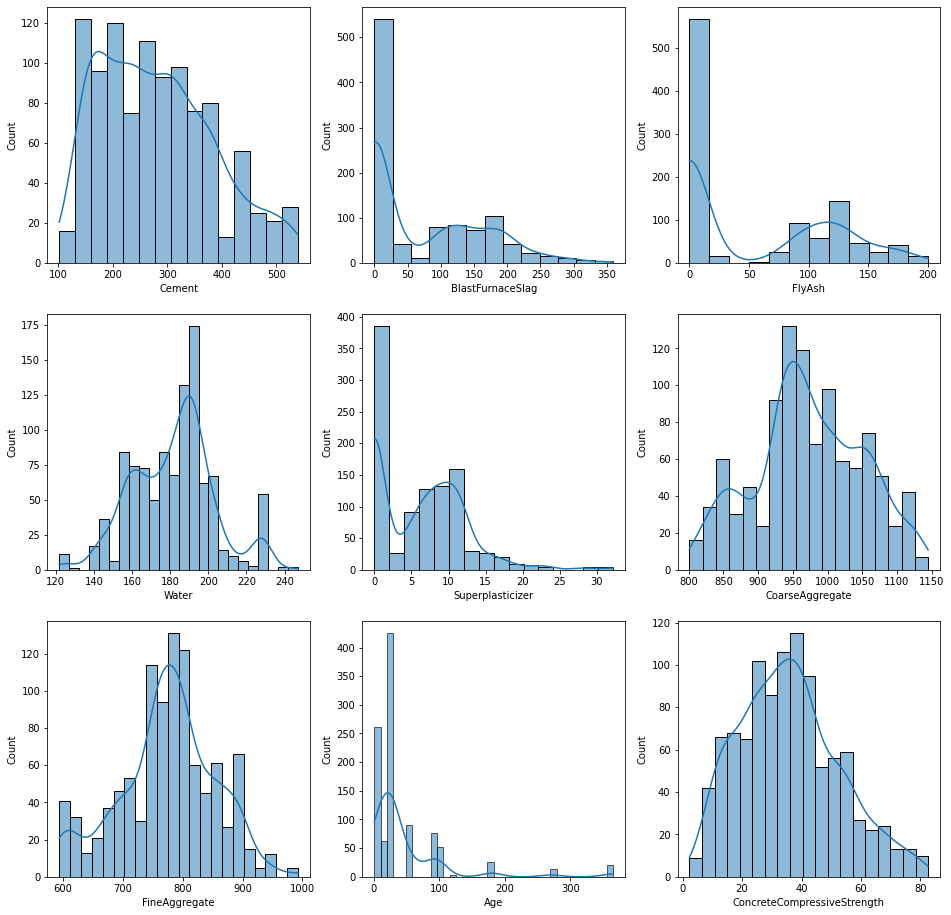

In [111]:
# Distribution Plots

fig, ax2 = plt.subplots(3,3, figsize = (16,16))
sns.histplot(data=cData['Cement'], ax = ax2[0][0], kde=True)
sns.histplot(data=cData['BlastFurnaceSlag'], ax = ax2[0][1], kde=True)
sns.histplot(data=cData['FlyAsh'], ax = ax2[0][2], kde=True)
sns.histplot(data=cData['Water'], ax = ax2[1][0], kde=True)
sns.histplot(data=cData['Superplasticizer'], ax = ax2[1][1], kde=True)
sns.histplot(data=cData['CoarseAggregate'], ax = ax2[1][2], kde=True)
sns.histplot(data=cData['FineAggregate'], ax = ax2[2][0], kde=True)
sns.histplot(data=cData['Age'], ax = ax2[2][1], kde=True)
sns.histplot(data=cData['ConcreteCompressiveStrength'], ax = ax2[2][2], kde=True)
plt.show()

In [113]:
cData.skew() # Checking the skewness

Cement                         0.509481
BlastFurnaceSlag               0.800717
FlyAsh                         0.537354
Water                          0.074628
Superplasticizer               0.907203
CoarseAggregate               -0.040220
FineAggregate                 -0.253010
Age                            3.269177
ConcreteCompressiveStrength    0.416977
dtype: float64

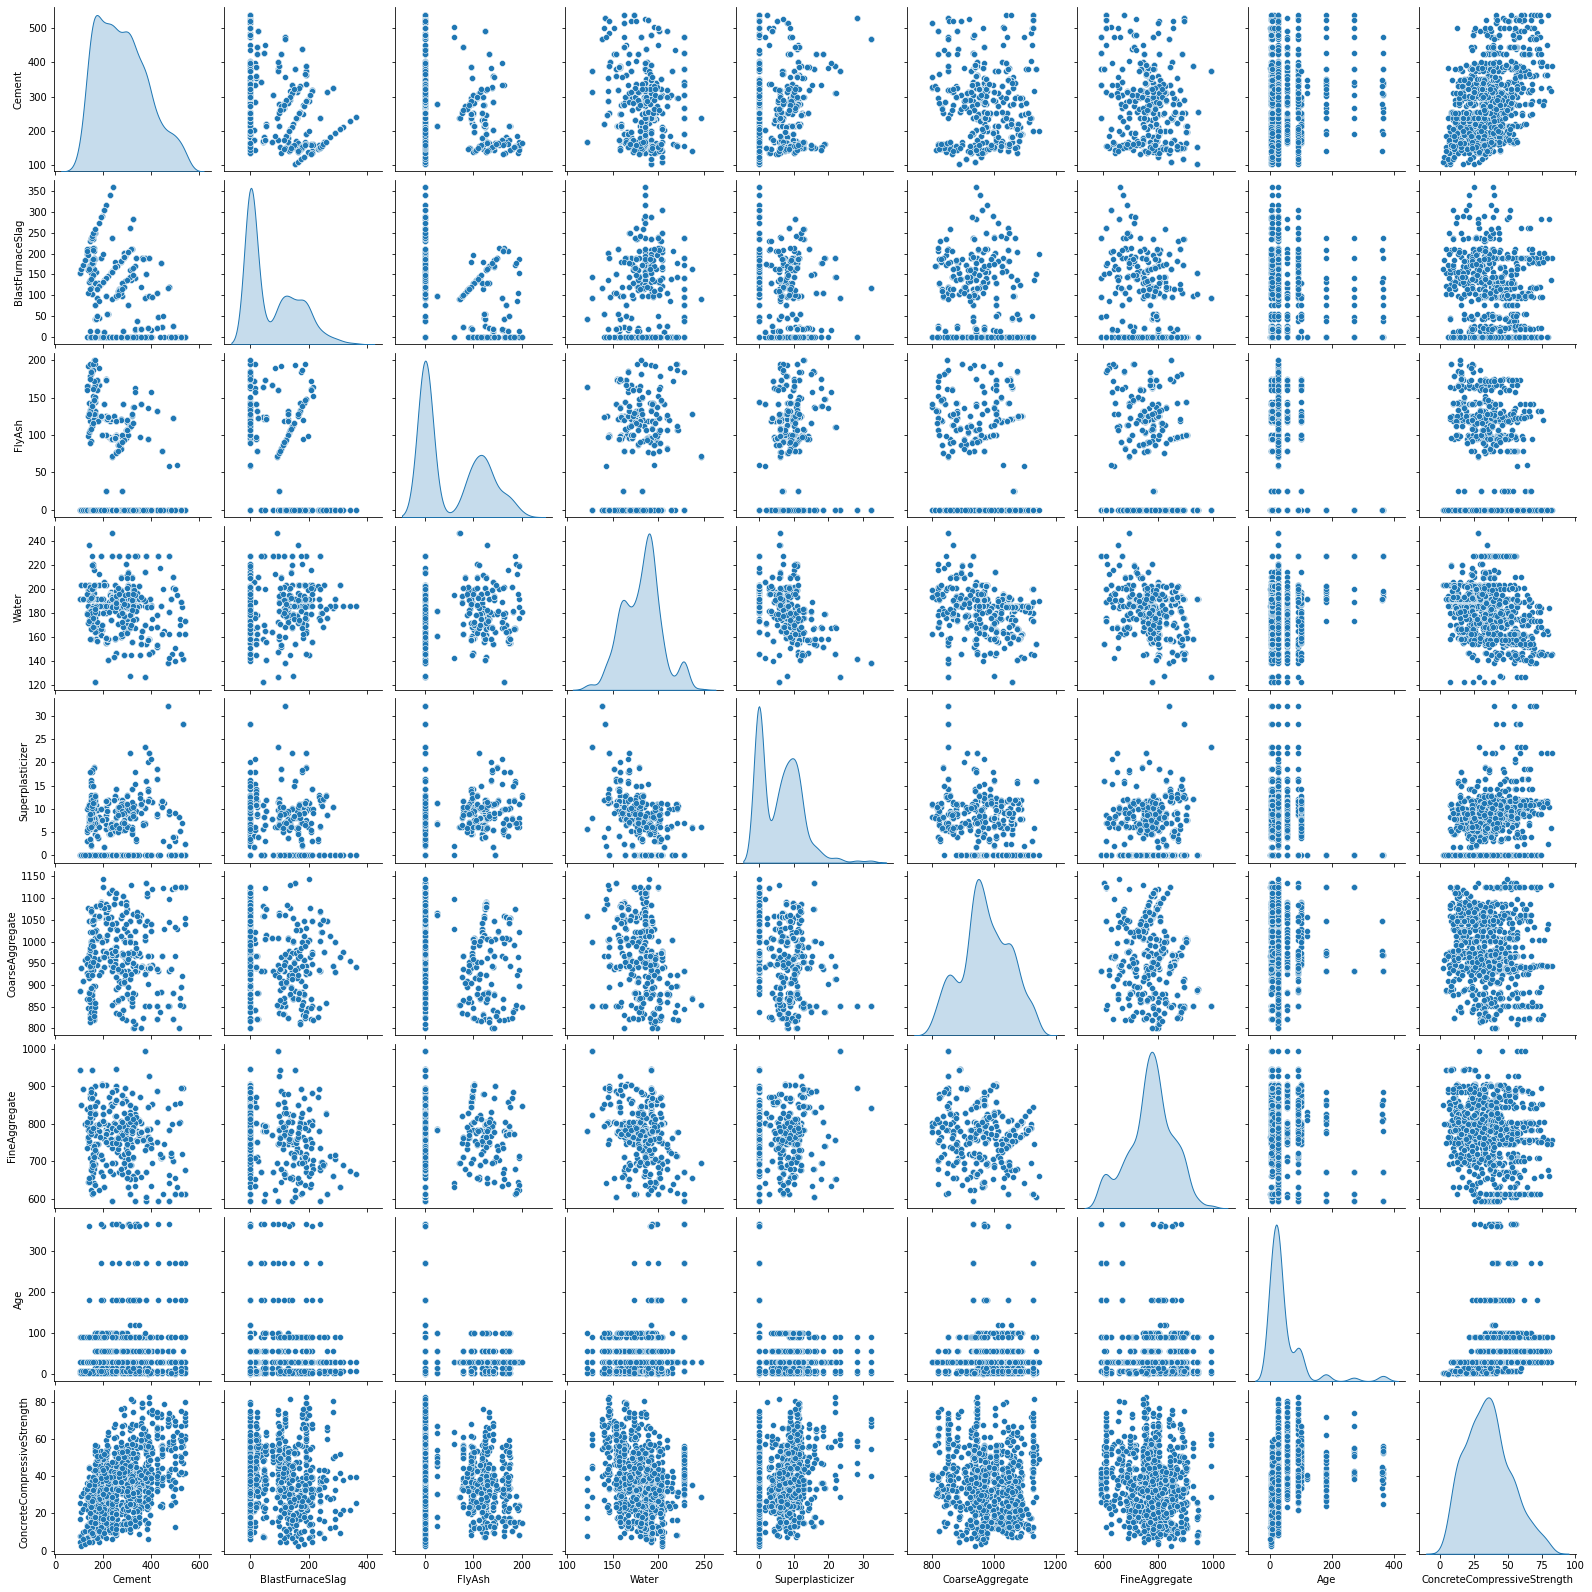

In [115]:
sns.pairplot(cData, diag_kind='kde') # Pairplots

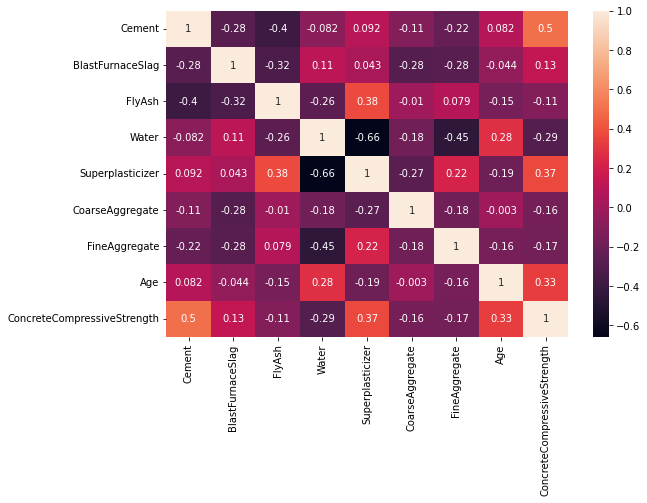

In [120]:
plt.figure(figsize=(9,6))
sns.heatmap(cData.corr(), annot=True) # Checking Correlation between variables
plt.show()

<AxesSubplot:>

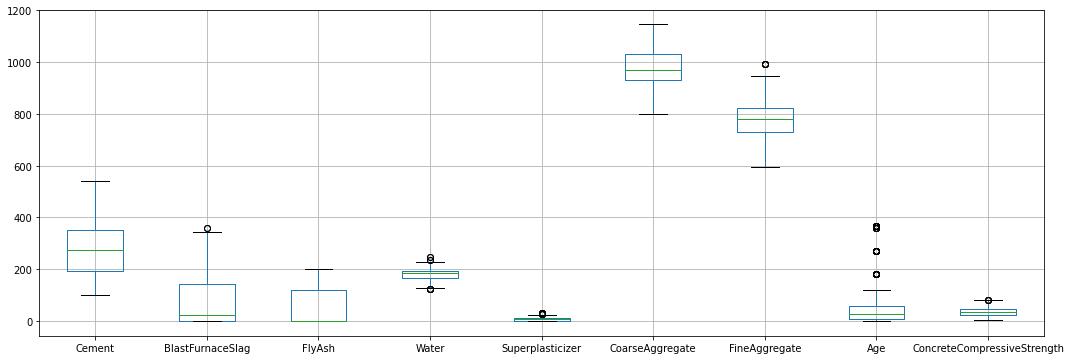

In [126]:
cData.boxplot(figsize=(18,6)) # Checking with Boxplots

### *Checking for Outlier*

In [129]:
print('Outliers in cement: ', cData[((cData.Cement - cData.Cement.mean())/cData.Cement.std()).abs()>3]['Cement'].count())
print('Outliers in slag: ', cData[((cData.BlastFurnaceSlag - cData.BlastFurnaceSlag.mean())/cData.BlastFurnaceSlag.std()).abs()>3]['BlastFurnaceSlag'].count())
print('Outliers in ash: ', cData[((cData.FlyAsh - cData.FlyAsh.mean())/cData.FlyAsh.std()).abs()>3]['FlyAsh'].count())
print('Outliers in water: ', cData[((cData.Water - cData.Water.mean())/cData.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', cData[((cData.Superplasticizer - cData.Superplasticizer.mean())/cData.Superplasticizer.std()).abs()>3]['Superplasticizer'].count())
print('Outliers in coarseagg: ', cData[((cData.CoarseAggregate - cData.CoarseAggregate.mean())/cData.CoarseAggregate.std()).abs()>3]['CoarseAggregate'].count())
print('Outliers in fineagg: ', cData[((cData.FineAggregate - cData.FineAggregate.mean())/cData.FineAggregate.std()).abs()>3]['FineAggregate'].count())
print('Outliers in age: ', cData[((cData.Age - cData.Age.mean())/cData.Age.std()).abs()>3]['Age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


### *REPLACING THE OUTLIERS BY MEDIAN*

In [132]:
for cols in cData.columns[:-1]:
#   print(cols)
    Q1 = cData[cols].quantile(0.25)
    Q3 = cData[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    cData.loc[(cData[cols] < low) | (cData[cols] > upper), cols] = cData[cols].median()

<AxesSubplot:>

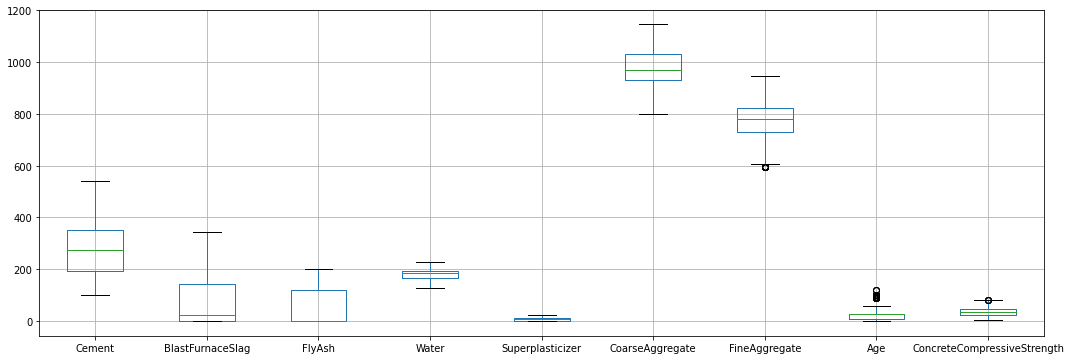

In [134]:
cData.boxplot(figsize=(18,6)) # Checking with Boxplots

## *FEATURE ENGINEERING AND MODEL BUILDING*

In [135]:
cData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [137]:
# Splitting the predictors and target

y = cData['ConcreteCompressiveStrength']
X = cData.drop('ConcreteCompressiveStrength',axis=1)

In [140]:
# Splitting into training and testing datasets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=0)

In [141]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape) # Checking the shape of the training and testing sets

(721, 8) (309, 8) (721,) (309,)


In [149]:
from sklearn.preprocessing import StandardScaler # import StandardScaler for Standardization

scaler = StandardScaler() # Initializing StandardScaler 

Scaledxtrain = scaler.fit_transform(xtrain)
Scaledxtest = scaler.transform(xtest)

In [150]:
Scaledxtrain[0]

array([ 0.97439458, -0.87184654, -0.8293616 ,  0.226551  , -1.1068481 ,
        0.97017264, -0.44616929, -0.89872384])

## *BUILDING MODEL*

### *RANDOM FOREST*

In [157]:
from sklearn.ensemble import RandomForestRegressor # Importing Random forest Regressor

rfr = RandomForestRegressor() # Initializing Random forest Regressor

rfr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

rfrpred = rfr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {rfr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {rfr.score(xtest, ytest)}')

Check Training Model Performance : 0.9793208182600794
Check Testing Model Performance : 0.8985304098393815


Text(0, 0.5, 'Predictions')

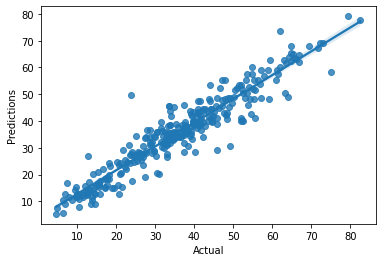

In [164]:
sns.regplot(x = ytest,y =  rfrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [165]:
from sklearn import metrics # Importing metrics to check the performance

metrics.r2_score(ytest, rfrpred)

0.8985304098393815

In [166]:
metrics.mean_squared_error(ytest, rfrpred)

26.047221423119783

In [201]:
# Storing the accuracy results for each model in the dataframe for final comparison

results = pd.DataFrame(columns=['Algorithm','Accuracy'])

In [202]:
results.loc[0]=('Random Forest Regressor',0.8985304098393815)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.89853


### *K FOLD CROSS VALIDATION*

In [180]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(rfr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.8789736605437752

In [203]:
results.loc[1]=('Random Forest Regressor with Cross Validation',0.8789736605437752)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974


### *GRADIENT BOOSTING REGRESSOR*

In [185]:
from sklearn.ensemble import GradientBoostingRegressor # Importing Gradient Boosting Regressor

gbr = RandomForestRegressor() # Initializing Gradient Boosting Regressor

gbr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

gbrpred = gbr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {gbr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {gbr.score(xtest, ytest)}')

Check Training Model Performance : 0.981429153339809
Check Testing Model Performance : 0.8992987499445613


Text(0, 0.5, 'Predictions')

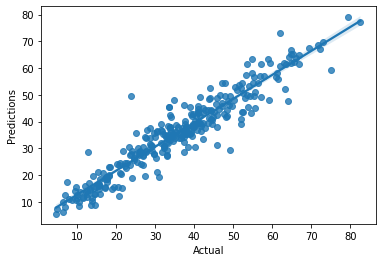

In [187]:
sns.regplot(x = ytest,y =  gbrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [188]:
metrics.r2_score(ytest, gbrpred)

0.8992987499445613

In [190]:
metrics.mean_squared_error(ytest, gbrpred)

25.849988687516912

In [204]:
results.loc[2]=('Gradient Boosting Regressor',0.8992987499445613)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299


### *K FOLD CROSS VALIDATION*

In [192]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(gbr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.8750538157144183

In [205]:
results.loc[3]=('Gradient Boosting Regressor with Cross Validation',0.8750538157144183)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054


### *ADA BOOSTING REGRESSOR*

In [195]:
from sklearn.ensemble import AdaBoostRegressor # Importing Ada BoostRegressor

abr = AdaBoostRegressor() # Initializing Ada Boost Regressor

abr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

abrpred = abr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {abr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {abr.score(xtest, ytest)}')

Check Training Model Performance : 0.8025494792039782
Check Testing Model Performance : 0.7570471796137048


Text(0, 0.5, 'Predictions')

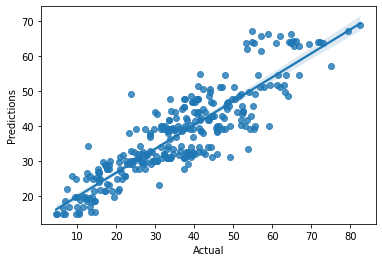

In [196]:
sns.regplot(x = ytest,y =  abrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [197]:
metrics.r2_score(ytest, abrpred)

0.7570471796137048

In [198]:
metrics.mean_squared_error(ytest, abrpred)

62.365935429089205

In [206]:
results.loc[4]=('Ada Boosting Regressor',0.7570471796137048)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047


### *K FOLD CROSS VALIDATION*

In [207]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(abr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.7587671484590942

In [208]:
results.loc[5]=('Ada Boost Regressor with Cross Validation',0.7587671484590942)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767


### *K NEIGHBORS REGRESSOR*

In [212]:
from sklearn.neighbors import KNeighborsRegressor # Importing K Neighbors Regressor


#Checking for different values of neighbors to determine K


K = []
for k in range(1,45):
    knnr = KNeighborsRegressor(n_neighbors=k) # Initializing K Neighbors Regressor
    knnr.fit(xtrain, ytrain) # Fitting xtrain and ytrain
    knnrpred = knnr.predict(xtest) # Testing with xtest
    K.append(np.mean(knnrpred != ytest))


In [214]:
print(K)

[0.8932038834951457, 0.9838187702265372, 0.9967637540453075, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [218]:
ytest

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
156    72.99
222    28.63
665    11.39
210    20.08
306    48.28
Name: ConcreteCompressiveStrength, Length: 309, dtype: float64

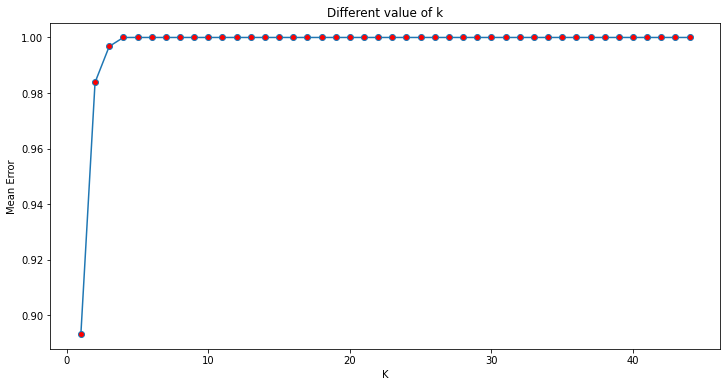

In [221]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),K,marker = 'o',markerfacecolor = 'red')
plt.xlabel('K')
plt.ylabel('Mean Error')
plt.title('Different value of k')
plt.show()

In [229]:
knnr = KNeighborsRegressor(n_neighbors=3) # Initializing K Neighbors Regressor
knnr.fit(xtrain, ytrain) # Fitting xtrain and ytrain
knnrpred = knnr.predict(xtest) # Testing with xtest

In [230]:
print(f'Check Training Model Performance : {knnr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {knnr.score(xtest, ytest)}')

Check Training Model Performance : 0.8508842692385165
Check Testing Model Performance : 0.6081749454921184


Text(0, 0.5, 'Predictions')

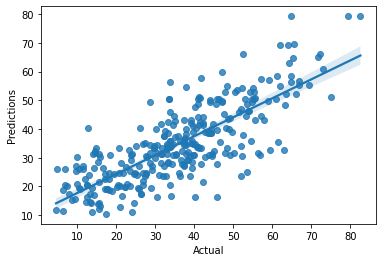

In [231]:
sns.regplot(x = ytest,y =  knnrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [232]:
metrics.r2_score(ytest, knnrpred)

0.6081749454921184

In [233]:
metrics.mean_squared_error(ytest, knnrpred)

100.58140510607694

In [236]:
results.loc[7]=('K Neighbors Regressor k as 3',0.6081749454921184)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175


### *K FOLD CROSS VALIDATION*

In [237]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(knnr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.6657255244855149

In [238]:
knnr

KNeighborsRegressor(n_neighbors=3)

In [242]:
results.loc[8]=('K Neighbors Regressor k as 3 with Cross V',0.6657255244855149)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross Valida...,0.662168


In [240]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(KNeighborsRegressor(n_neighbors=4),xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.6621678998440444

In [243]:
results.loc[9]=('K Neighbors Regressor k as 4 with Cross V',0.6621678998440444)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *BAGGING REGRESSOR*

In [245]:
from sklearn.ensemble import BaggingRegressor # Importing Bagging Regressor

bgr = BaggingRegressor() # Initializing Bagging Regressor

bgr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

bgrpred = bgr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {bgr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {bgr.score(xtest, ytest)}')

Check Training Model Performance : 0.9753669088922335
Check Testing Model Performance : 0.8879841966926891


Text(0, 0.5, 'Predictions')

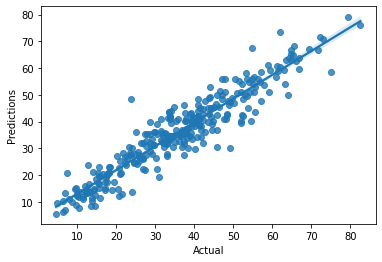

In [246]:
sns.regplot(x = ytest,y =  bgrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [247]:
metrics.r2_score(ytest, bgrpred)

0.8879841966926891

In [248]:
metrics.mean_squared_error(ytest, bgrpred)

28.754432012740608

In [249]:
results.loc[10]=('Bagging Regressor',0.8879841966926891)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *K FOLD CROSS VALIDATION*

In [250]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(bgr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.8700331689137342

In [253]:
results.loc[11]=('Bagging Regressor with Cross Validation',0.8700331689137342)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *SUPPORT VECTOR REGRESSOR*

In [254]:
from sklearn.svm import SVR # Importing Support Vector Regressor

svr = SVR() # Initializing Support Vector Regressor

svr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

svrpred = svr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {svr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {svr.score(xtest, ytest)}')

Check Training Model Performance : 0.22550645460394636
Check Testing Model Performance : 0.2369312458002536


Text(0, 0.5, 'Predictions')

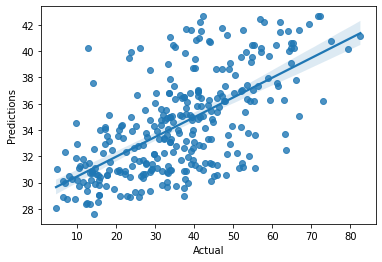

In [255]:
sns.regplot(x = ytest,y =  svrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [256]:
print(metrics.r2_score(ytest, svrpred))
print(metrics.mean_squared_error(ytest, svrpred))

0.2369312458002536
195.8795809684761


In [258]:
results.loc[12]=('Support Vector Regressor with rbf',0.2369312458002536)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


In [259]:
from sklearn.svm import SVR # Importing Support Vector Regressor

svr = SVR(kernel='linear') # Initializing Support Vector Regressor

svr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

svrpred = svr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {svr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {svr.score(xtest, ytest)}')

Check Training Model Performance : 0.7188428330804546
Check Testing Model Performance : 0.694028922670923


Text(0, 0.5, 'Predictions')

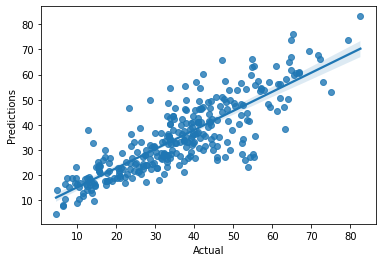

In [260]:
sns.regplot(x = ytest,y =  svrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [261]:
print(metrics.r2_score(ytest, svrpred))
print(metrics.mean_squared_error(ytest, svrpred))

0.694028922670923
78.54270809259761


In [262]:
results.loc[13]=('Support Vector Regressor with linear',0.694028922670923)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *K FOLD CROSS VALIDATION*

In [265]:
k = 10

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(svr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.7071570410364119

In [267]:
results.loc[14]=('Support Vector Regressor with linear with CV',0.7071570410364119)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *XGBOOST REGRESSOR*

In [269]:
from xgboost import XGBRegressor # Importing XG Boost Regressor

xgbr = XGBRegressor() # Initializing XG Boost Regressor

xgbr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

xgbrpred = xgbr.predict(xtest) # Testing with xtest


Text(0, 0.5, 'Predictions')

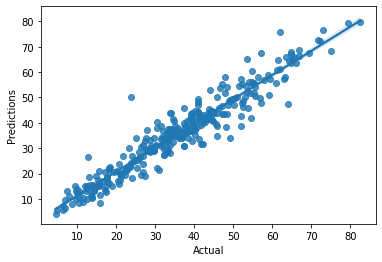

In [270]:
sns.regplot(x = ytest,y =  xgbrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [275]:
print(metrics.r2_score(ytrain, xgbr.predict(xtrain))) # Training Performance/Score

0.9917135648998856


In [271]:
print(metrics.r2_score(ytest, svrpred)) # Testing Performance/Score
print(metrics.mean_squared_error(ytest, svrpred))

0.694028922670923
78.54270809259761


In [272]:
results.loc[15]=('XG Boost Regressor',0.694028922670923)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *K FOLD CROSS VALIDATION*

In [273]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(xgbr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.8961976922674431

In [274]:
results.loc[16]=('XG Boost Regressor with Cross Validation',0.8961976922674431)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *DECISION TREE REGRESSOR*

In [276]:
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor

dtr = DecisionTreeRegressor() # Initializing Decision Tree Regressor

dtr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

dtrpred = dtr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {dtr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {dtr.score(xtest, ytest)}')

Check Training Model Performance : 0.9923184215288596
Check Testing Model Performance : 0.7844829116323826


In [294]:
# Model is overfitting with Decision Tree

Text(0, 0.5, 'Predictions')

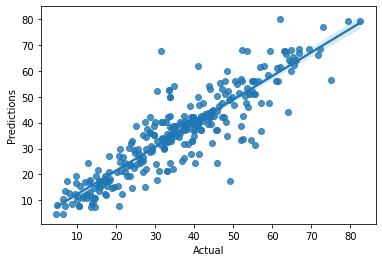

In [277]:
sns.regplot(x = ytest,y =  dtrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [278]:
print(metrics.r2_score(ytest, dtrpred)) # Testing Performance/Score
print(metrics.mean_squared_error(ytest, dtrpred))

0.7844829116323826
55.32318906868034


In [279]:
results.loc[17]=('Decision Tree Regressor',0.7844829116323826)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


In [293]:
pd.DataFrame(dtr.feature_importances_,columns=['FeatureImportance'], index = xtrain.columns).sort_values(by = 'FeatureImportance', ascending=False)

,FeatureImportance
Cement,0.339352
Age,0.328695
Water,0.107189
BlastFurnaceSlag,0.073558
Superplasticizer,0.050180
CoarseAggregate,0.035436
FineAggregate,0.033473
FlyAsh,0.032118


### *K FOLD CROSS VALIDATION*

In [299]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(dtr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.6573599471190897

In [300]:
results.loc[18]=('Decision Tree Regressor with Cross Validation',0.6573599471190897)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *REMOVING NON IMPORTANT FEATURES*

In [304]:
backup_cData = cData.copy() # Create a backup copy

In [305]:
cData.head(1)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [306]:
# Splitting into dependent and independent

y = cData['ConcreteCompressiveStrength']
X = cData.drop(['CoarseAggregate','FineAggregate','FlyAsh','ConcreteCompressiveStrength'],axis = 1)

In [307]:
# Splitting into training and testing

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=0)

In [308]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape) # Checking shapes

(721, 5) (309, 5) (721,) (309,)


In [309]:
from sklearn.preprocessing import StandardScaler # import StandardScaler for Standardization

scaler = StandardScaler() # Initializing StandardScaler 

Scaledxtrain = scaler.fit_transform(xtrain)
Scaledxtest = scaler.transform(xtest)

### *DECISION TREE AFTER REMOVING NON IMPORTANT FEATURES*

In [327]:
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor

dtr = DecisionTreeRegressor() # Initializing Decision Tree Regressor

dtr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

dtrpred = dtr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {dtr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {dtr.score(xtest, ytest)}')

Check Training Model Performance : 0.9908302844124605
Check Testing Model Performance : 0.848597671309552


Text(0, 0.5, 'Predictions')

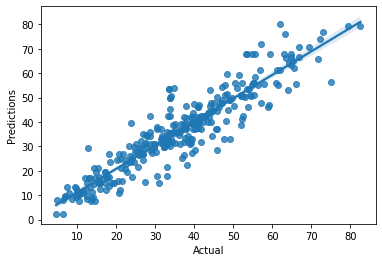

In [312]:
sns.regplot(x = ytest,y =  dtrpred)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [313]:
print(metrics.r2_score(ytest, dtrpred)) # Testing Performance/Score
print(metrics.mean_squared_error(ytest, dtrpred))

0.8456180588649724
39.62981025260697


In [314]:
results.loc[19]=('Decision Tree Regressor after removing non important features',0.8456180588649724)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *K FOLD CROSS VALIDATION*

In [315]:
k = 20

from sklearn.model_selection import KFold # importing KFold for Cross Validation
cv = KFold(n_splits=k,shuffle = True, random_state=1)
accuracy = np.mean(abs(cross_val_score(dtr,xtrain, ytrain,cv = cv)))
accuracy

<IPython.core.display.Javascript object>

0.7878770229990251

In [317]:
results.loc[20]=('Decision Tree Regressor with CV after removing non important features',0.7878770229990251)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168


### *DECISION TREE AFTER REMOVING NON IMPORTANT FEATURES AND PRUNING*

In [331]:
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor

dtr = DecisionTreeRegressor(max_depth=4, random_state=0, min_samples_leaf=5) # Initializing Decision Tree Regressor

dtr.fit(xtrain, ytrain) # Fitting xtrain and ytrain

dtrpred = dtr.predict(xtest) # Testing with xtest

print(f'Check Training Model Performance : {dtr.score(xtrain, ytrain)}')
print(f'Check Testing Model Performance : {dtr.score(xtest, ytest)}')

Check Training Model Performance : 0.7397933943022963
Check Testing Model Performance : 0.6386671150801508


In [332]:
pd.DataFrame(dtr.feature_importances_,columns=['FeatureImportance'], index = xtrain.columns).sort_values(by = 'FeatureImportance', ascending=False)

,FeatureImportance
Age,0.424347
Cement,0.375215
Water,0.091270
Superplasticizer,0.060890
BlastFurnaceSlag,0.048278


In [333]:
from sklearn.tree import export_graphviz
import graphviz
import pydot
from IPython.display import Image
from six import StringIO

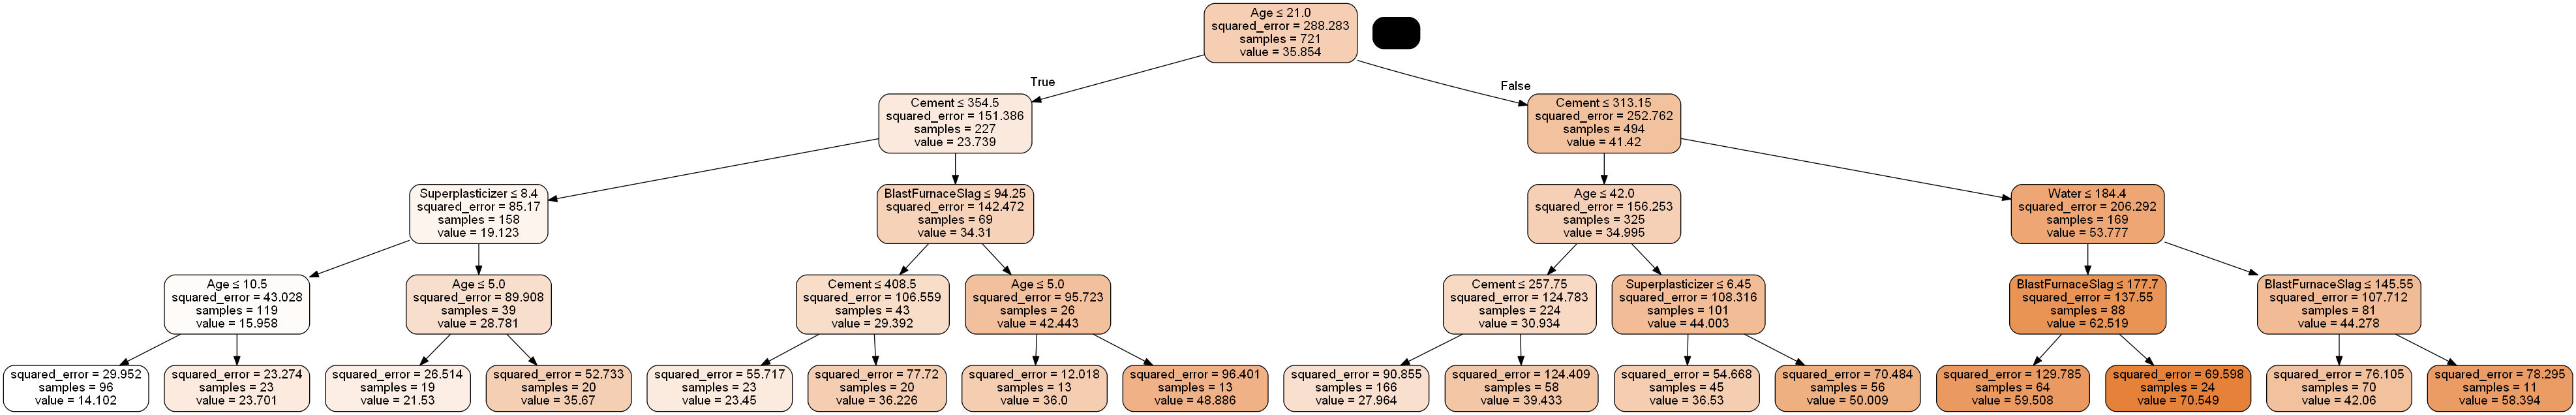

In [334]:
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,filled=True, rounded=True,
               special_characters=True,feature_names=xtrain.columns,
               class_names=['0','1'])

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [335]:
results.loc[21]=('Pruned Decision Tree Regressor after removing non important features',0.7397933943022963)
results

,Algorithm,Accuracy
0,Random Forest Regressor,0.898530
1,Random Forest Regressor with Cross Validation,0.878974
2,Gradient Boosting Regressor,0.899299
3,Gradient Boosting Regressor with Cross Validation,0.875054
4,Ada Boosting Regressor,0.757047
5,Ada Boost Regressor with Cross Validation,0.758767
6,K Neighbors Regressor k as 4,0.581086
7,K Neighbors Regressor k as 3,0.608175
8,K Neighbors Regressor k as 3 with Cross V,0.665726
9,K Neighbors Regressor k as 4 with Cross V,0.662168
